In [3]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import yahoo finance library
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Fetch the data by specifying the number of period
df1 = yf.download('SPY', period='5d', progress=False)

# Fetch data by specifying the the start and end dates
df2 = yf.download('SPY', start='2020-12-24', end='2020-12-31', progress=False)

# Fetch data for year to date (YTD)
df3 = yf.download('SPY', period='ytd', progress=False)

In [5]:
# Specify stocks
faang_stocks = ['AAPL', 'AMZN', 'FB', 'GOOG', 'NFLX']

In [6]:
# Fetch data for multiple stocks at once
df4 = yf.download(faang_stocks, period='ytd', progress=False)['Adj Close']

# Display dataframe
df4.tail()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2022-07-01,138.929993,109.559998,160.029999,2181.620117,179.949997
2022-07-05,141.559998,113.500000,168.190002,2277.739990,185.880005
2022-07-06,142.919998,114.330002,169.770004,2304.270020,184.059998
2022-07-07,146.350006,116.330002,172.190002,2386.120117,189.270004
2022-07-08,147.039993,115.540001,170.880005,2403.370117,186.979996


In [7]:
# Fetch data for multiple fields using comprehension
ohlcv= {symbol: yf.download(symbol, period='250d', progress=False) 
             for symbol in faang_stocks}

ohlcv

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-07-13  144.029999  147.460007  143.630005  145.639999  144.812653   
 2021-07-14  148.100006  149.570007  147.679993  149.149994  148.302704   
 2021-07-15  149.240005  150.000000  147.089996  148.479996  147.636520   
 2021-07-16  148.460007  149.759995  145.880005  146.389999  145.558380   
 2021-07-19  143.750000  144.070007  141.669998  142.449997  141.640778   
 ...                ...         ...         ...         ...         ...   
 2022-07-01  136.039993  139.039993  135.660004  138.929993  138.929993   
 2022-07-05  137.770004  141.610001  136.929993  141.559998  141.559998   
 2022-07-06  141.350006  144.119995  141.080002  142.919998  142.919998   
 2022-07-07  143.289993  146.550003  143.279999  146.350006  146.350006   
 2022-07-08  145.259995  147.550003  145.000000  147.039993  147.039993   
 
               

In [8]:
# Display AMZN stock data
ohlcv['AMZN']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-13,185.104996,188.654007,183.565994,183.867996,183.867996,76918000
2021-07-14,185.442505,185.882996,183.041504,184.084000,184.084000,65932000
2021-07-15,184.710007,184.770004,181.046005,181.559998,181.559998,63706000
2021-07-16,181.665497,182.302994,178.522995,178.681503,178.681503,80874000
2021-07-19,176.628998,177.510498,174.957993,177.479507,177.479507,75692000
...,...,...,...,...,...,...
2022-07-01,106.290001,109.750000,105.849998,109.559998,109.559998,72952000
2022-07-05,107.599998,114.080002,106.320000,113.500000,113.500000,76583700
2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900


In [9]:
# Display AMZN adjusted close data
ohlcv['AMZN']['Adj Close']

Date
2021-07-13    183.867996
2021-07-14    184.084000
2021-07-15    181.559998
2021-07-16    178.681503
2021-07-19    177.479507
                 ...    
2022-07-01    109.559998
2022-07-05    113.500000
2022-07-06    114.330002
2022-07-07    116.330002
2022-07-08    115.540001
Name: Adj Close, Length: 250, dtype: float64

In [10]:
# Retrieve intraday data for last five days
df6 = yf.download(tickers='SPY', period='5d', interval='1m', progress=False)

# Display last five rows of the dataframe
df6.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-08 15:56:00-04:00,389.239990,389.250000,389.084991,389.165009,389.165009,220187
2022-07-08 15:57:00-04:00,389.170013,389.215088,388.980011,389.040009,389.040009,398283
2022-07-08 15:58:00-04:00,389.040009,389.070007,388.679993,388.760010,388.760010,651389
2022-07-08 15:59:00-04:00,388.829987,388.829987,388.420013,388.679993,388.679993,1740208
2022-07-08 16:00:00-04:00,388.670013,388.670013,388.670013,388.670013,388.670013,0


In [11]:
# Get SPY option chain
spy = yf.Ticker('SPY')
options = spy.option_chain('2022-07-11')
options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0    SPY220711C00320000 2022-06-21 15:58:49+00:00   320.0      55.20  0.0   
1    SPY220711C00325000 2022-07-08 19:08:17+00:00   325.0      64.81  0.0   
2    SPY220711C00328000 2022-07-08 18:50:03+00:00   328.0      61.85  0.0   
3    SPY220711C00330000 2022-07-08 16:06:07+00:00   330.0      59.32  0.0   
4    SPY220711C00331000 2022-06-29 13:50:48+00:00   331.0      49.59  0.0   
..                  ...                       ...     ...        ...  ...   
115  SPY220711C00460000 2022-06-27 19:48:10+00:00   460.0       0.02  0.0   
116  SPY220711C00465000 2022-06-24 13:30:07+00:00   465.0       0.02  0.0   
117  SPY220711C00470000 2022-06-27 15:33:55+00:00   470.0       0.01  0.0   
118  SPY220711C00480000 2022-06-17 18:10:22+00:00   480.0       0.02  0.0   
119  SPY220711C00490000 2022-07-08 19:03:08+00:00   490.0       0.01  0.0   

     ask  change  percentChange  volume  openInterest  implie

In [12]:
# read data from wikipedia
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [13]:
sp500

[    Symbol              Security SEC filings             GICS Sector  \
 0      MMM                    3M     reports             Industrials   
 1      AOS           A. O. Smith     reports             Industrials   
 2      ABT                Abbott     reports             Health Care   
 3     ABBV                AbbVie     reports             Health Care   
 4     ABMD               Abiomed     reports             Health Care   
 ..     ...                   ...         ...                     ...   
 498    YUM           Yum! Brands     reports  Consumer Discretionary   
 499   ZBRA    Zebra Technologies     reports  Information Technology   
 500    ZBH         Zimmer Biomet     reports             Health Care   
 501   ZION  Zions Bancorporation     reports              Financials   
 502    ZTS                Zoetis     reports             Health Care   
 
                       GICS Sub-Industry    Headquarters Location  \
 0              Industrial Conglomerates    Saint Pau

In [14]:
sp500[0]['Symbol']

0       MMM
1       AOS
2       ABT
3      ABBV
4      ABMD
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [15]:
# filter table for symbols
stocklist = list(sp500[0]['Symbol'])
stocklist[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP']

In [16]:
# Read the VIX file
vix = yf.download('VIX')
# Manipulate the index to datetime from object
vix.index = pd.to_datetime(vix.index)

vix = vix.iloc[:,:4]

# Check the last five values
vix.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2018-01-22,9900.0,10000.0,9600.0,9800.0
2018-01-23,9900.0,9900.0,9700.0,9900.0
2018-01-26,9300.0,9500.0,8400.0,9300.0
2018-01-30,9700.0,9700.0,9300.0,9300.0
2018-01-31,9400.0,9400.0,9100.0,9300.0


In [17]:
vix.iplot(kind='line', title='CBOE Volatily Index')

In [18]:
df3[-30:].iplot(kind='ohlc',title='SPY Price')

In [19]:
df3[-30:].iplot(kind='candle', title='SPY Price')

In [20]:
# Use secondary axis
df4[['AMZN', 'AAPL']].iplot(title='Amazon Vs Apple', secondary_y='AAPL')

In [21]:
# Use subplots
df4[['AMZN', 'AAPL']].iplot(title='Amazon Vs Apple Price Movement', subplots=True)

In [22]:
df4.normalize().iplot(title='The FAANG Stocks')

In [23]:
# Use numpy log function to derive log normal returns
daily_returns = np.log(df4).diff().dropna()

# Display the last five rows of the data frame to check the output
daily_returns.head(5)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2022-01-04,-0.012773,-0.017060,-0.005955,-0.004546,-0.010467
2022-01-05,-0.026960,-0.019074,-0.037419,-0.047962,-0.040794
2022-01-06,-0.016834,-0.006734,0.025251,-0.000745,-0.025394
2022-01-07,0.000988,-0.004297,-0.002017,-0.003981,-0.022352
2022-01-10,0.000116,-0.006592,-0.011275,0.011391,-0.002239


In [24]:
# Plot Daily Returns
daily_returns[['AAPL','GOOG']].iplot(title='Daily Log Returns')

In [25]:
# Plot Mean Annual Returns
(daily_returns.mean()*252).iplot(kind='bar')

In [26]:
# To calculate 5 days rolling returns, simply sum daily returns for 5 days as log returns are additive
rolling_return = daily_returns.rolling(5).sum().dropna()

# Display the last five rows of the data frame to check the output
rolling_return.head(5)

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2022-01-10,-0.055463,-0.053757,-0.031415,-0.045843,-0.101245
2022-01-11,-0.026046,-0.012978,-0.006439,-0.030934,-0.088946
2022-01-12,0.003481,0.005158,0.027655,0.028605,-0.054868
2022-01-13,0.001104,-0.012575,-0.018151,0.011421,-0.063593
2022-01-14,0.005214,-0.002562,0.000331,0.020102,-0.028818


In [27]:
# Plot Rolling Returns
rolling_return['NFLX'].iplot(title='5-Days Rolling Returns of NetFlix')

In [28]:
# Analysing the daily returns data
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,128.0,-0.001645,0.022404,-0.058073,-0.018591,-0.000719,0.015996,0.067451
AMZN,128.0,-0.003036,0.033709,-0.151398,-0.021901,-0.001428,0.020015,0.126949
FB,128.0,-0.005341,0.043762,-0.306391,-0.024545,-0.003278,0.017769,0.162064
GOOG,128.0,-0.001472,0.024091,-0.052776,-0.018128,-0.000336,0.014059,0.071086
NFLX,128.0,-0.009074,0.055827,-0.432578,-0.027987,-0.009736,0.019831,0.105532


In [29]:
# Plot log normal distribution of returns
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns', subplots=True)

In [30]:
# Plot correlation of returns
daily_returns.corr().iplot(kind='heatmap', title="Correlation Matrix", colorscale="Blues")

In [31]:
# Compute pairwise correlation
daily_returns.corrwith(daily_returns['FB'])

AAPL    0.595173
AMZN    0.627588
FB      1.000000
GOOG    0.686554
NFLX    0.547670
dtype: float64

In [32]:
# Resampling to derive weekly values from daily time series
df_weekly = df4[['AAPL']].resample('W').last()

# Display the last five rows of the data frame to check the output
df_weekly.tail(5)

,AAPL
Date,
2022-06-12,137.130005
2022-06-19,131.559998
2022-06-26,141.660004
2022-07-03,138.929993
2022-07-10,147.039993


In [33]:
# Resampling to a specific day of the week: Thursday
df_weekly_thu = df4[['AAPL']].resample('W-THU').ffill()

# Display the last five rows of the data frame to check the output
df_weekly_thu.tail()

,AAPL
Date,
2022-06-16,130.059998
2022-06-23,138.270004
2022-06-30,136.720001
2022-07-07,146.350006
2022-07-14,147.039993


In [34]:
# Resampling to derive monthly values from daily time series
df_monthly = df4[['AAPL']].resample('M').last()

# Display the last five rows of the data frame to check the output
df_monthly.tail()

,AAPL
Date,
2022-03-31,174.353836
2022-04-30,157.418701
2022-05-31,148.839996
2022-06-30,136.720001
2022-07-31,147.039993


In [35]:
# Retrive unique years from our data frame
years = vix.index.year.unique()

# Create an empty data frame
newdf = pd.DataFrame()

# Use generators to assign values to empty dataframe, reset and drop index
for year in years:
    newdf[year] = pd.Series(vix[vix.index.year==year]['Close']).reset_index(drop=True)

# Fill missing values forward with latest values
newdf = newdf.ffill(axis=1)

# Display the first five rows of the data frame to check the results
newdf.head()

,2014,2015,2016,2017,2018
0,28447.699219,16903.699219,6077.100098,5238.100098,11000.0
1,26056.500000,16821.300781,5895.689941,5238.100098,10600.0
2,23582.800781,18470.400391,5986.390137,5238.100098,10500.0
3,21274.000000,19872.199219,5623.580078,5047.620117,10500.0
4,19295.000000,20119.599609,5351.470215,5047.620117,10600.0


In [36]:
# Analysing year wise statistics for India Volatility Index
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
2014,19.0,19117.047440,3434.650661,15914.200195,16862.500000,17728.300781,19253.750000,28447.699219
2015,19.0,20419.015728,1662.421590,16821.300781,19789.750000,21026.599609,21480.100586,22758.199219
2016,19.0,5609.261128,272.551030,5170.069824,5351.470215,5623.580078,5804.990234,6077.100098
2017,19.0,5463.661133,394.227266,4952.379883,5190.479980,5333.330078,5666.669922,6095.240234
2018,19.0,9610.025288,1327.168507,6095.240234,9500.000000,9900.000000,10450.000000,11000.000000


In [37]:
# Visualize VIX Box Plot
newdf.iloc[:,2:].iplot(kind='box', 
            title='CBOE Volatility Index', 
            yTitle='Annualised Volatility (%)', 
            legend=False, boxpoints='outliers')

# RETURNS

In [39]:
# Import Pandas, Numpy and Scipy
import pandas as pd
import numpy as np
from scipy.stats import norm

# Import matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt

# Plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the CSV file
spx = yf.download('SPX')

# Output first five values
spx

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-02,1.74884,2.49834,1.74884,2.49834,2.49834,2562
2000-03-03,1.87375,1.87375,1.87375,1.87375,1.87375,80
2000-03-06,2.49834,2.49834,2.49834,2.49834,2.49834,240
2000-03-07,4.37209,4.37209,4.37209,4.37209,4.37209,0
2000-03-08,4.37209,4.37209,4.37209,4.37209,4.37209,0
...,...,...,...,...,...,...
2018-01-24,0.05500,0.05500,0.05500,0.05500,0.05500,7000
2018-01-25,0.05500,0.05500,0.05500,0.05500,0.05500,1160
2018-01-26,0.05000,0.05000,0.05000,0.05000,0.05000,1800


In [41]:
# Verify the datetime format
spx.index

DatetimeIndex(['2000-03-02', '2000-03-03', '2000-03-06', '2000-03-07',
               '2000-03-08', '2000-03-09', '2000-03-10', '2000-03-13',
               '2000-03-14', '2000-03-15',
               ...
               '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-22',
               '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26',
               '2018-01-29', '2018-01-30'],
              dtype='datetime64[ns]', name='Date', length=4489, freq=None)

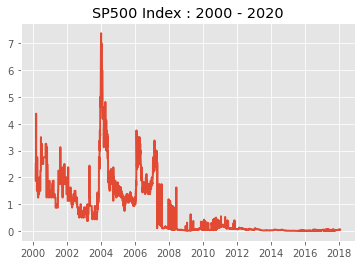

In [43]:
# Slice the DataFrame to get values from 1950
spx = spx['2000':]

# Visualize the plot to verify the data
plt.plot(spx.index, spx['Adj Close'])
plt.title('SP500 Index : 2000 - 2020');

In [44]:
# Calculate returns and add it to existing DataFrame as a column
spx['Return'] = spx['Adj Close'].pct_change().fillna(0)

# Get first 5 rows
spx['Return'].head()

Date
2000-03-02    0.000000
2000-03-03   -0.250002
2000-03-06    0.333337
2000-03-07    0.749998
2000-03-08    0.000000
Name: Return, dtype: float64

In [45]:
# Calculate mean and sigma
mu = np.mean(spx['Return'])
sigma = np.std(spx['Return'])

print(f'Mean {mu:.6f}, Sigma {sigma:.6f}')

Mean 0.159149, Sigma 1.252560


In [46]:
# Calculate the scaled return
spx['Scaled_Return'] = spx['Return'].apply(lambda x: (x - mu)/sigma)

# Check the output
spx.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
2000-03-02,1.74884,2.49834,1.74884,2.49834,2.49834,2562,0.000000,-0.127059
2000-03-03,1.87375,1.87375,1.87375,1.87375,1.87375,80,-0.250002,-0.326652
2000-03-06,2.49834,2.49834,2.49834,2.49834,2.49834,240,0.333337,0.139065
2000-03-07,4.37209,4.37209,4.37209,4.37209,4.37209,0,0.749998,0.471713
2000-03-08,4.37209,4.37209,4.37209,4.37209,4.37209,0,0.000000,-0.127059


In [47]:
# Calculate minimum and maximum bin range
sr_min = np.min(spx['Scaled_Return'])
sr_max = np.max(spx['Scaled_Return'])

print(f'Minimum {sr_min:.6f}, Maximum {sr_max:.6f}')

Minimum -0.895091, Maximum 20.087751


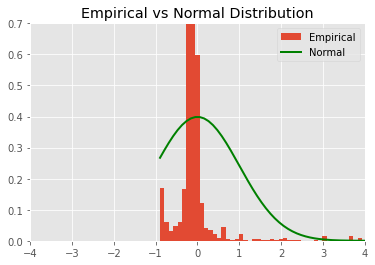

In [49]:
# Define bins
x = np.linspace(sr_min, sr_max, 200)

# Calculate normal probability density function
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2)) # can also use norm.pdf(x,0,1)

# Plot histogram of scaled returns
plt.hist(spx['Scaled_Return'], bins=200, density=True, label = 'Empirical', alpha=1)

# Plot norm pdf
plt.plot(x, y, color = 'green', label = 'Normal', alpha=1)

# Set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.7)

# Set title
plt.title('Empirical vs Normal Distribution')

# Set legends
plt.legend()